# Semi conductor fault detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

wafer_df=pd.read_csv('mixed_categorical_numerical_dataDummy.csv')
wafer_df.head()

,X1-1,X1-2,X2-1,X2-2,X2-3,X3-1,X3-2,X3-3,X3-4,X4-1,X4-2,X4-3,X4-4,X4-5,X4-6,X4-7,X5-1,X5-2,X5-3,X5-4,X5-5,X5-6,X5-7,X5-8,X5-9,X5-10,X5-11,X5-12,X5-13,X5-14,X5-15,X5-16,X5-17,X5-18,X5-19,X5-20,X5-21,X5-22,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y
0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.025286,50,48,105,3.0,2.0,0.45,8,1600,8,0.8,1546.836248
1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.034876,67,34,105,3.0,2.0,0.45,8,1600,10,0.8,1261.722593
2,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.079237,176,187,200,8.0,6.0,0.75,8,216,10,0.8,860.853275
3,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.113288,176,187,200,8.0,6.0,0.75,8,216,10,0.8,887.356349
4,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.113778,176,187,200,8.0,6.0,0.75,8,216,10,0.8,895.059756


# FEATURE IMPORTANCE
### Applying feature importance to truncate least usefull feature to prevent overfitting

In [2]:
from sklearn.ensemble import RandomForestRegressor

#dividing datafrmae in PARAMETERS AND RESPONSE
X=wafer_df.iloc[:,~wafer_df.columns.isin(['Y'])]
y=wafer_df['Y']

#FITTING THE MODEL RANDOM FOREST
model=RandomForestRegressor()
model.fit(X,y)

#FEATURE IMPORTANCE
featrue_importance=model.feature_importances_
feature_importances_df=pd.DataFrame({"Feature":X.columns,"Importance":featrue_importance})
feature_importances_df=feature_importances_df.sort_values(by='Importance',ascending=False)
print(feature_importances_df.head(10))

   Feature  Importance
47     X15    0.793554
38      X6    0.127702
13    X4-5    0.022026
40      X8    0.008177
39      X7    0.005849
46     X14    0.004748
41      X9    0.004539
44     X12    0.004097
43     X11    0.003999
45     X13    0.002556


## FEATURE IMPORTANCE FOR NUMERIC DATA

   Feature  Importance
9      X15    0.793554
0       X6    0.127702
2       X8    0.008177
1       X7    0.005849
8      X14    0.004748
3       X9    0.004539
6      X12    0.004097
5      X11    0.003999
7      X13    0.002556
10     X16    0.002499
4      X10    0.001766


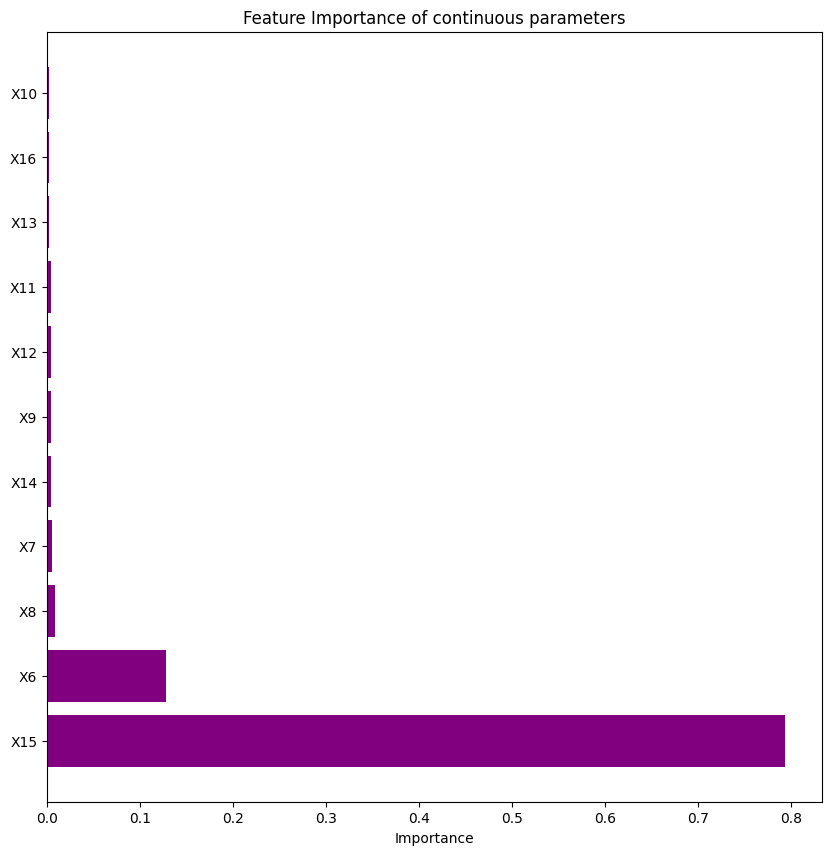

In [3]:
non_classify_X=wafer_df.iloc[:,38:49]
non_classify_feature_importance_df=pd.DataFrame({"Feature":non_classify_X.columns,"Importance":featrue_importance[38:]})
non_classify_feature_importance_df=non_classify_feature_importance_df.sort_values(by='Importance',ascending=False)
print(non_classify_feature_importance_df)
plt.figure(figsize=(10,10))
plt.barh(non_classify_feature_importance_df['Feature'],non_classify_feature_importance_df['Importance'],color='Purple')
plt.xlabel('Importance')
plt.title('Feature Importance of continuous parameters')
plt.show()

## FEATURE IMPORTANCE FOR CATAGORICAL DATA

   Feature    Importance
13    X4-5  2.202593e-02
6     X3-2  2.201582e-03
7     X3-3  1.797788e-03
3     X2-2  1.618650e-03
17    X5-2  1.535621e-03
5     X3-1  1.448565e-03
4     X2-3  1.303029e-03
32   X5-17  1.109279e-03
0     X1-1  1.074945e-03
12    X4-4  1.040412e-03
27   X5-12  9.453292e-04
14    X4-6  8.564668e-04
9     X4-1  8.430749e-04
10    X4-2  5.764963e-04
26   X5-11  4.556096e-04
1     X1-2  3.623153e-04
16    X5-1  3.184741e-04
2     X2-1  2.881832e-04
15    X4-7  2.022891e-04
33   X5-18  1.235210e-04
28   X5-13  1.137527e-04
36   X5-21  8.117663e-05
18    X5-3  5.178328e-05
24    X5-9  4.826931e-05
37   X5-22  3.095857e-05
31   X5-16  1.734404e-05
8     X3-4  1.644858e-05
30   X5-15  1.015509e-05
23    X5-8  5.085046e-06
20    X5-5  3.580652e-06
25   X5-10  1.795180e-06
29   X5-14  1.719197e-06
22    X5-7  1.557728e-06
21    X5-6  1.191056e-06
19    X5-4  7.629710e-07
11    X4-3  2.231810e-07
34   X5-19  1.835507e-07
35   X5-20  1.158029e-08


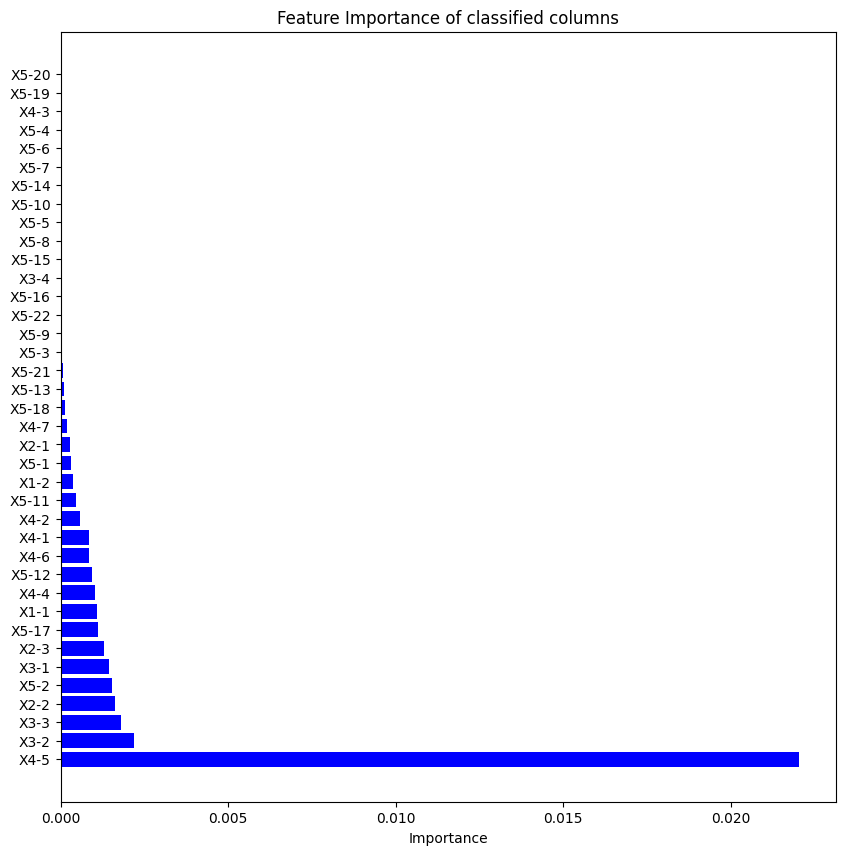

In [4]:
classify_X=wafer_df.iloc[:,:38]
classify_feature_importance_df=pd.DataFrame({"Feature":classify_X.columns,"Importance":featrue_importance[:38]})
classify_feature_importance_df=classify_feature_importance_df.sort_values(by='Importance',ascending=False)
print(classify_feature_importance_df)
plt.figure(figsize=(10,10))
plt.barh(classify_feature_importance_df['Feature'],classify_feature_importance_df['Importance'],color='Blue')
plt.xlabel('Importance')
plt.title('Feature Importance of classified columns')
plt.show()

# Correlation anlysis
### AS FEATURE IMPORTANCE ALONE IS NOT ENOUGH WE DO CORRELATION ANALYSIS TO GAIN INSIGHT OF MULTI-COLINEARITY.
### CORRELATION ONLY GIVES INSIGHT FOR LINEAR RELATION SO CORRELATION AND FEATURE IMPORTANCE BOTH GIVES MEANING WHEN THEY ARE ANALYSED COMBINED.

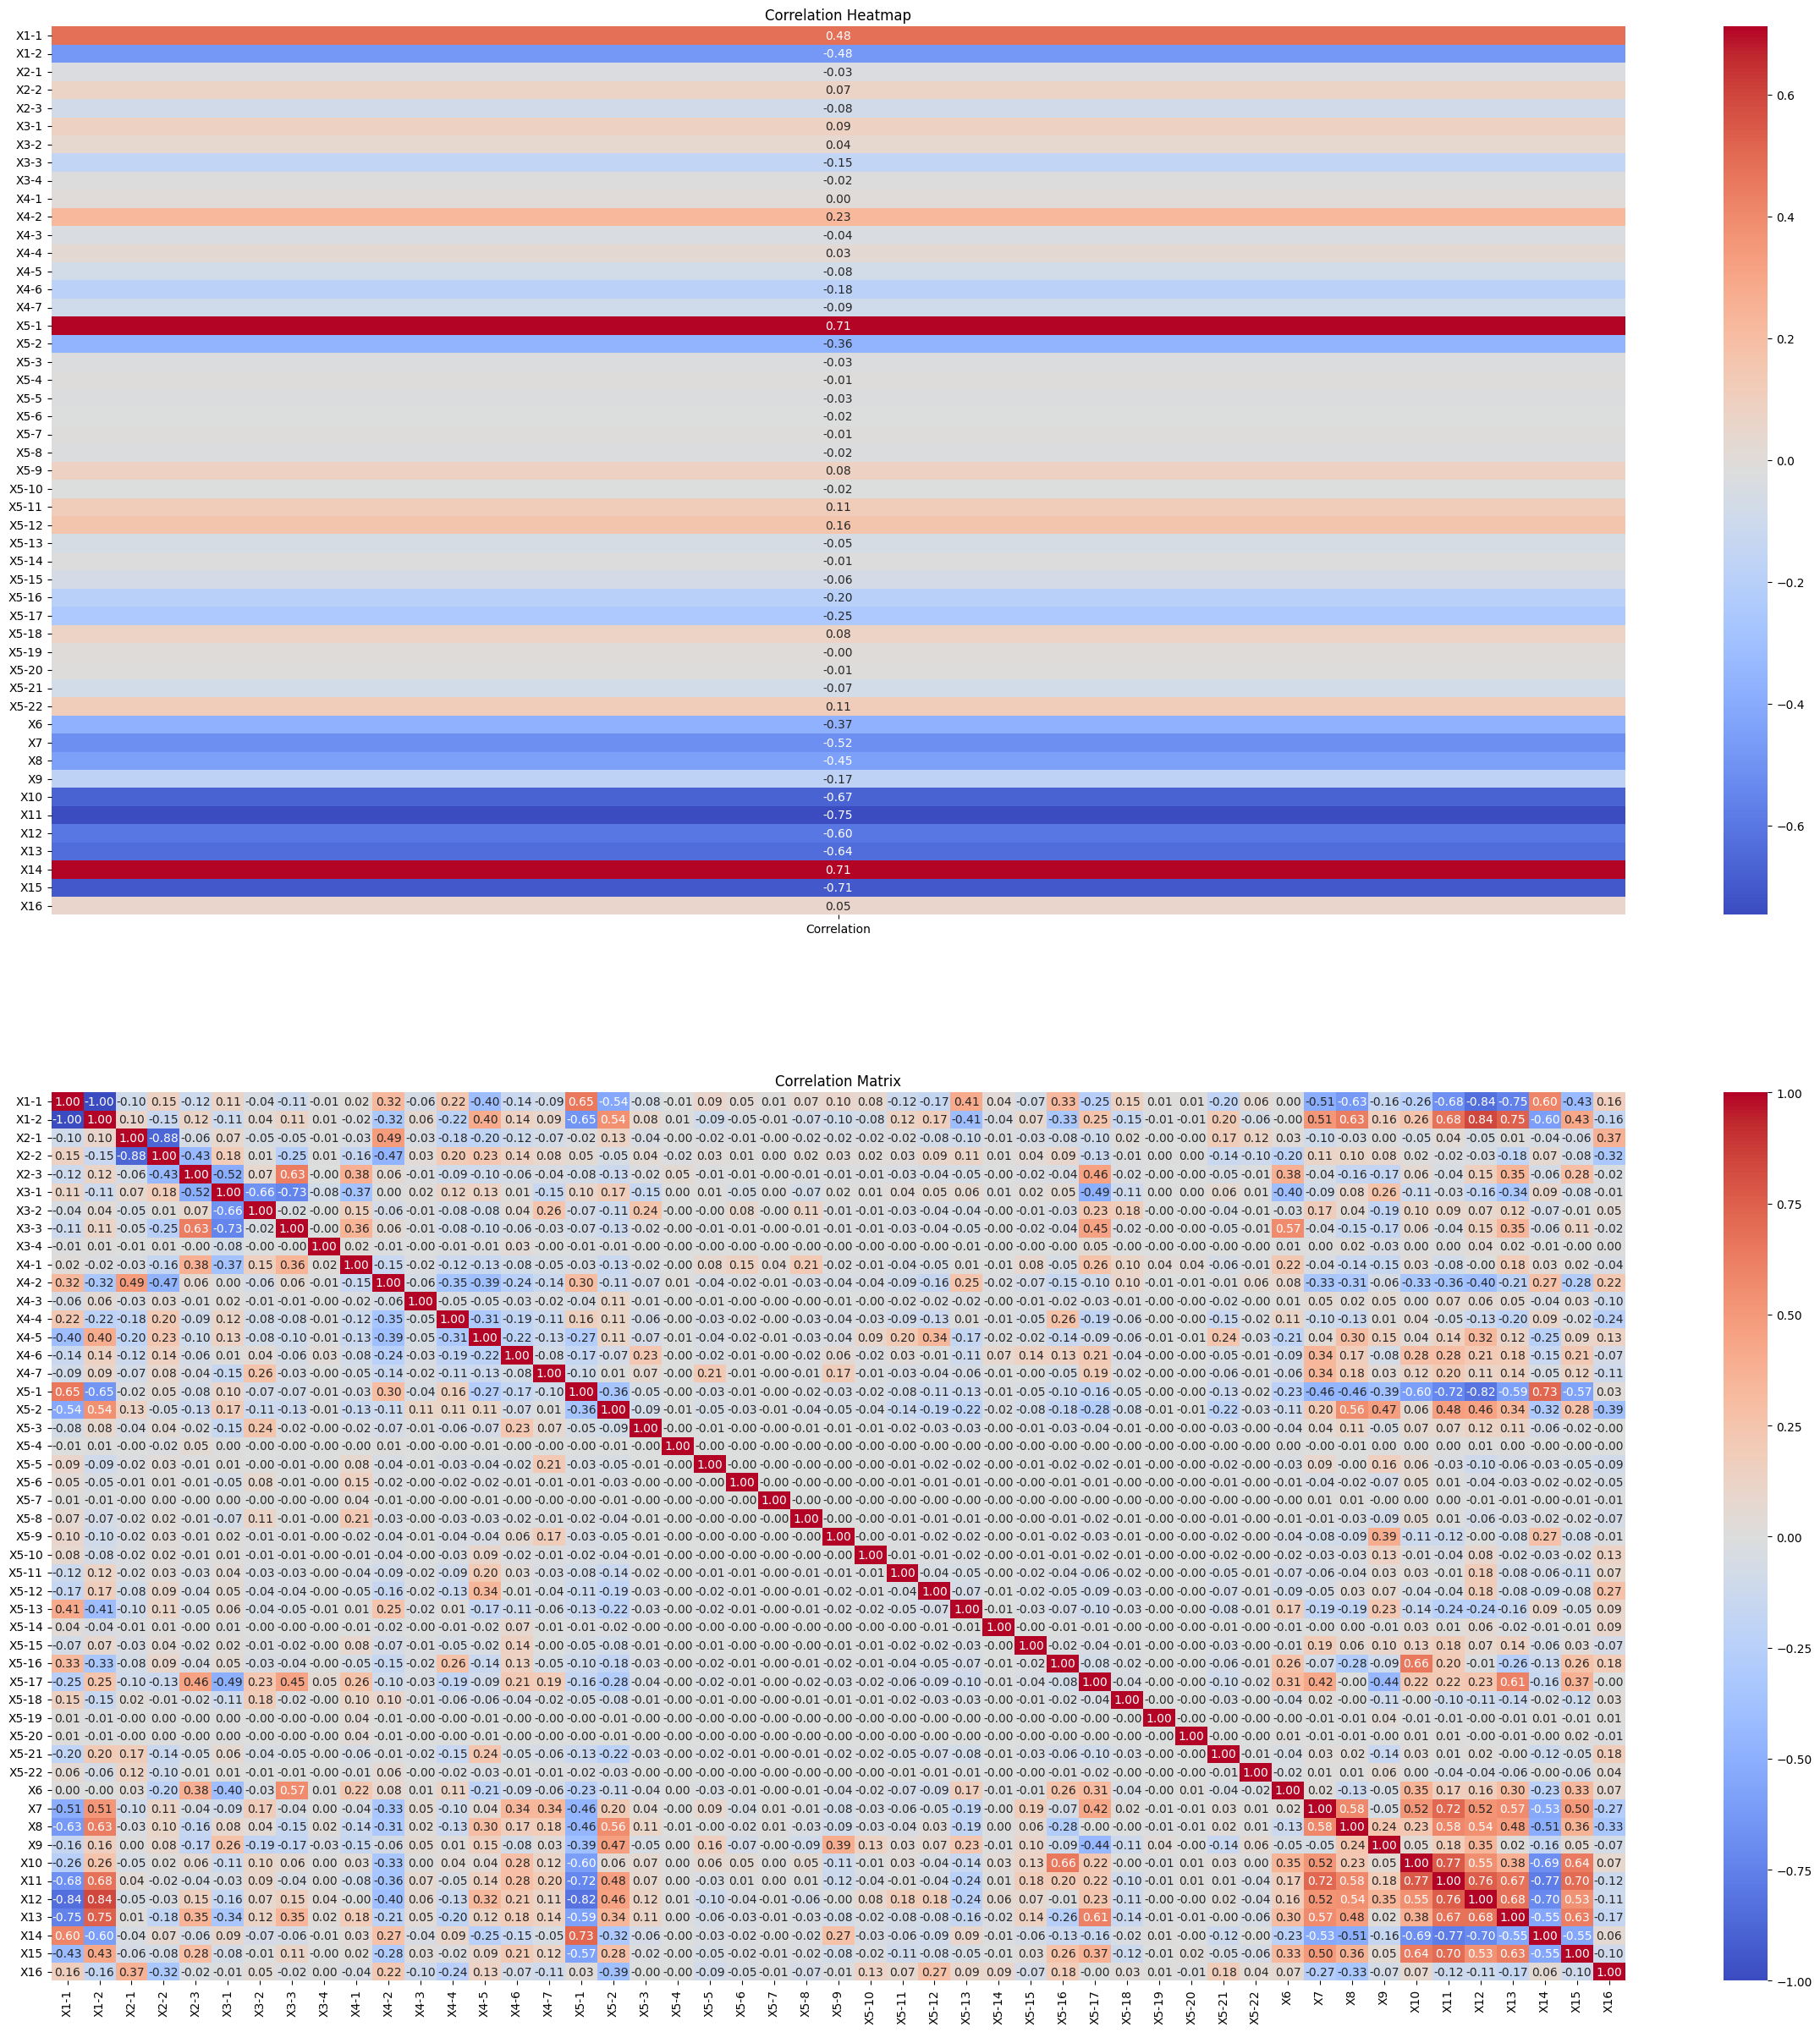

In [5]:
correlation=X.corrwith(wafer_df['Y'])
correlation=pd.DataFrame(correlation,columns=['Correlation'])
correlation_matrix=X.corr()
plt.figure(figsize=(30,30))
plt.subplot(2,1,1)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.subplot(2,1,2)
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

AFTER DOING ANALYSIS FROM FEATURE IMPORTANCE AND CORRELATION.

In [6]:
wafer_df=wafer_df.drop(['X16','X9'],axis=1)

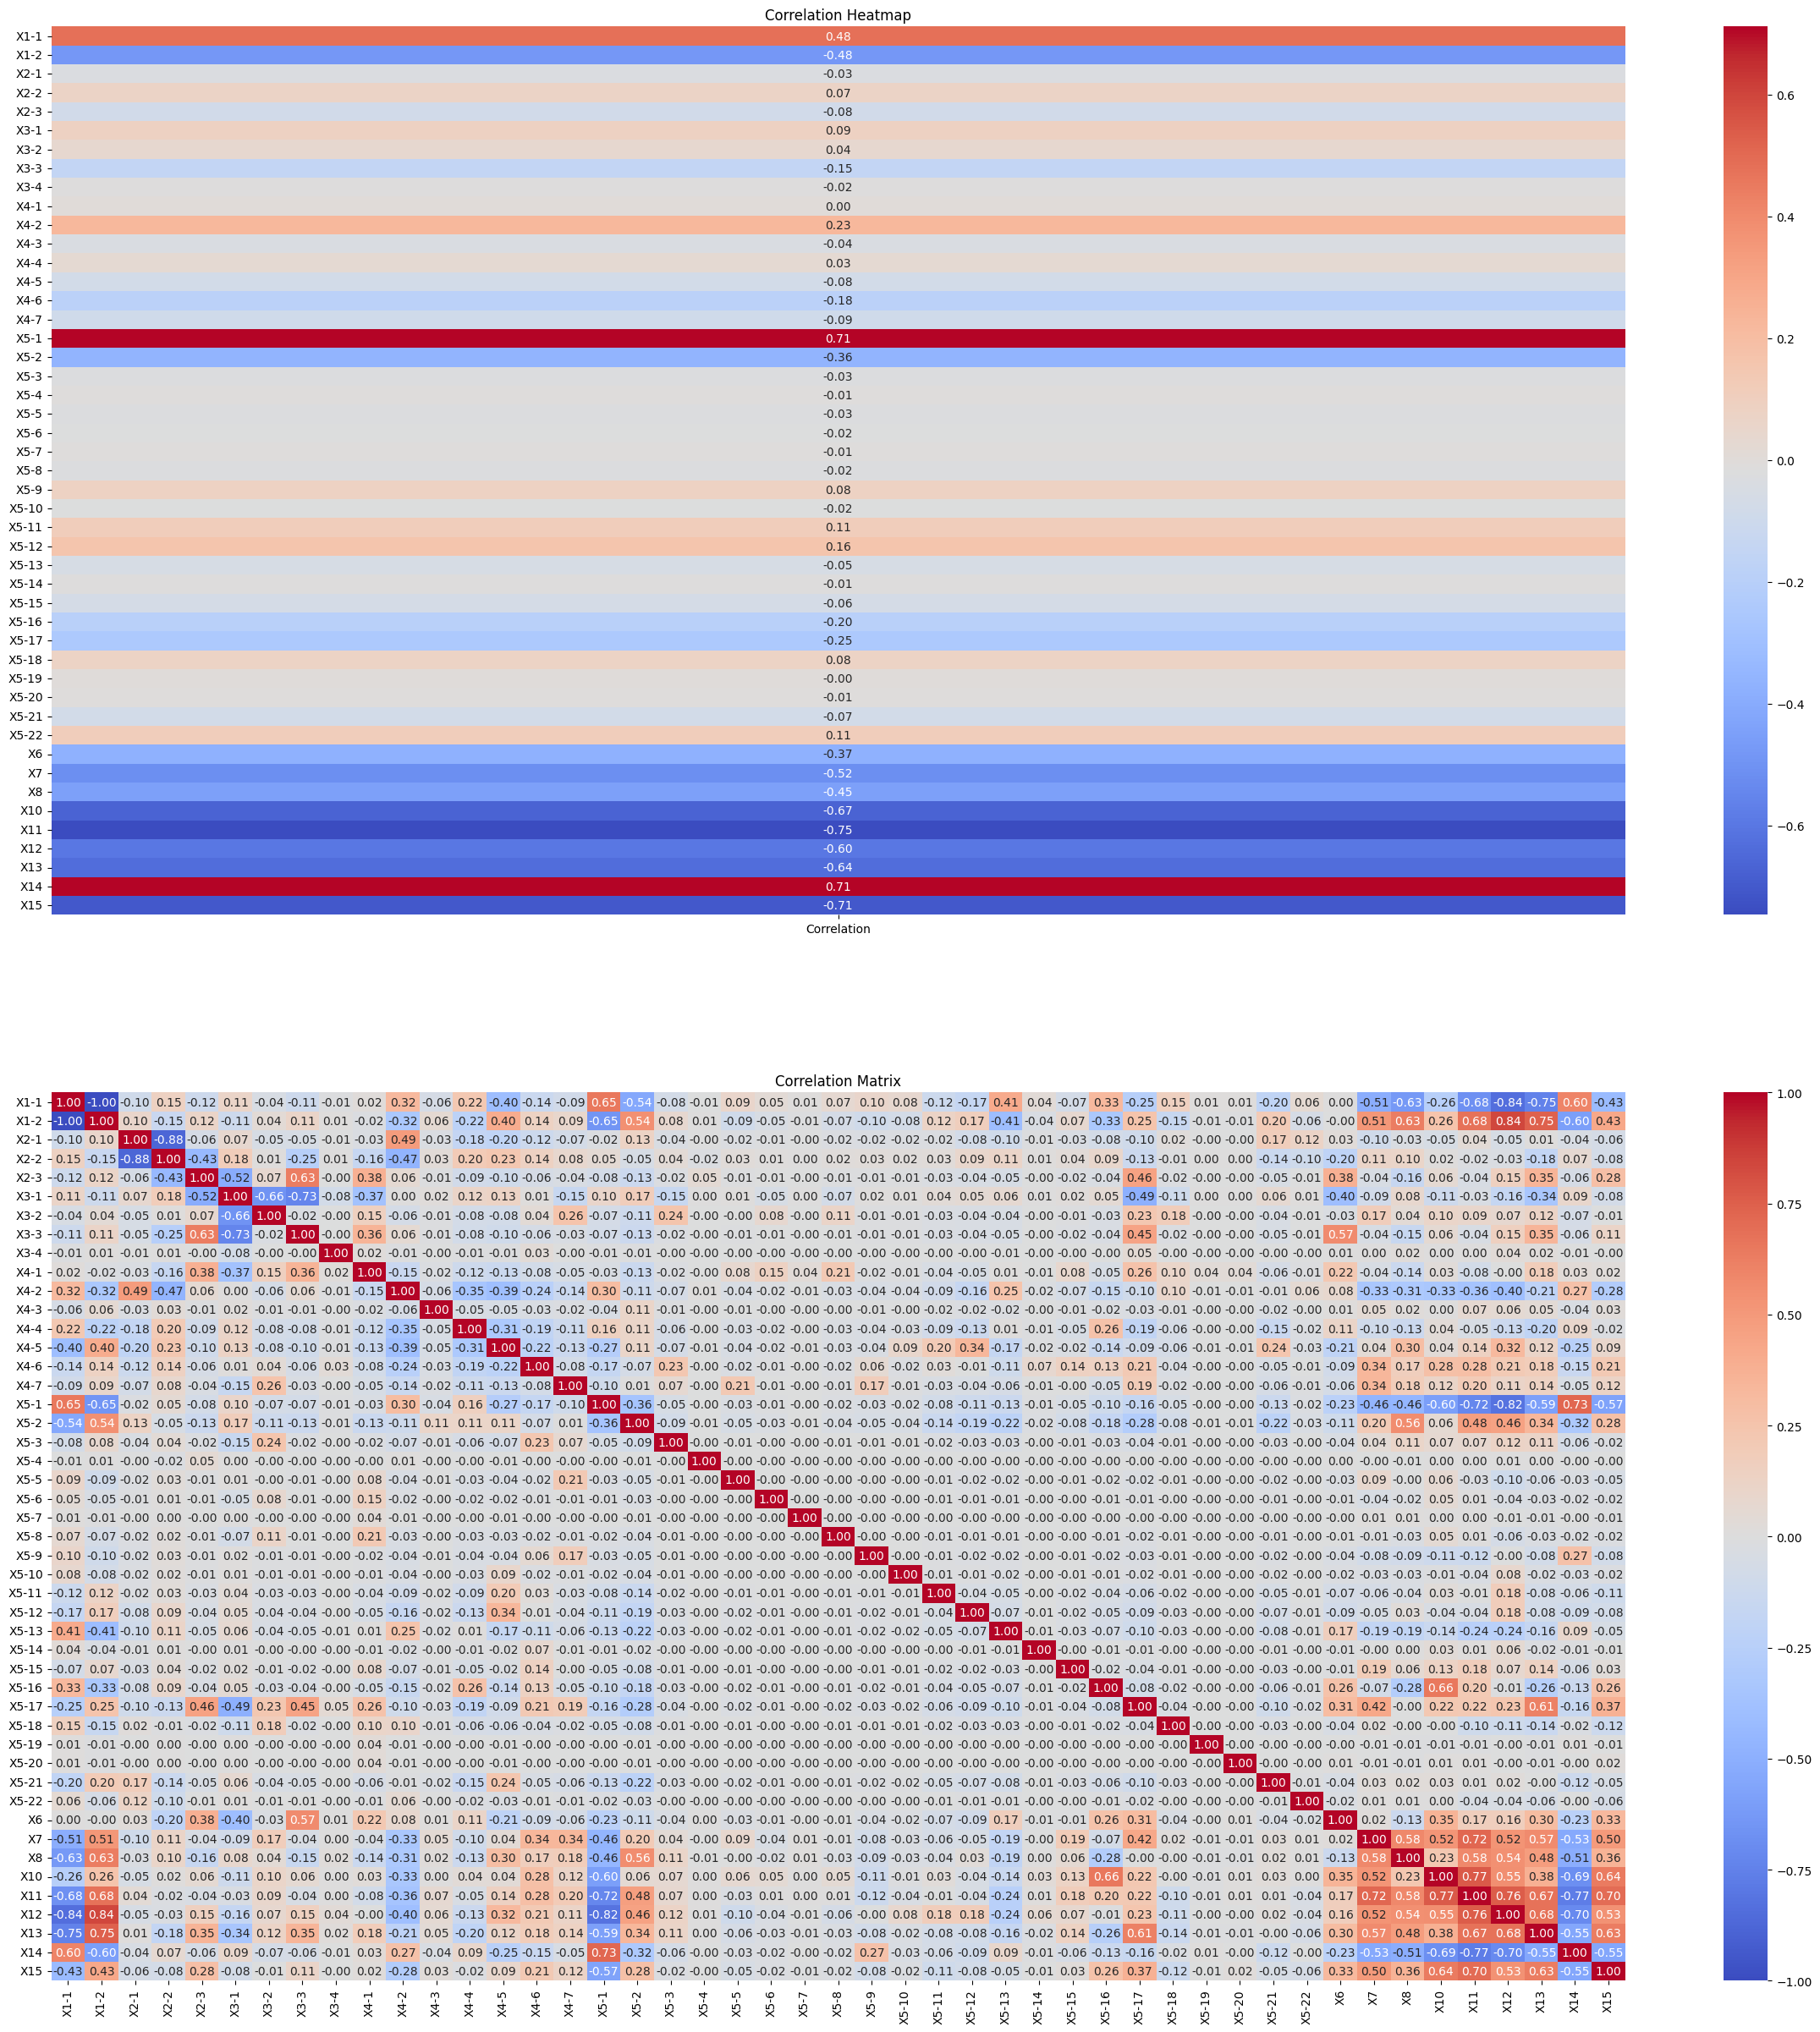

In [7]:
X_1=wafer_df.iloc[:,~wafer_df.columns.isin(['Y'])]
correlation=X_1.corrwith(wafer_df['Y'])
correlation=pd.DataFrame(correlation,columns=['Correlation'])
correlation_matrix=X_1.corr()
plt.figure(figsize=(30,30))
plt.subplot(2,1,1)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.subplot(2,1,2)
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# BEFORE PCA DIMENSION REDUCTION BY VIF

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# Define a function to apply VIF and PCA
def apply_vif_pca(data, response_col):
    X = data.drop(response_col, axis=1)
    y = data[response_col]

    # Calculate VIF
    vif_result = calculate_vif(X)
    print("VIF Results:")
    print(vif_result)
# Apply VIF and PCA to your data
apply_vif_pca(wafer_df, 'Y')

C:\Users\91942\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF Results:
   Feature        VIF
0     X1-1        inf
1     X1-2        inf
2     X2-1        inf
3     X2-2        inf
4     X2-3        inf
5     X3-1        inf
6     X3-2        inf
7     X3-3        inf
8     X3-4        inf
9     X4-1        inf
10    X4-2        inf
11    X4-3        inf
12    X4-4        inf
13    X4-5        inf
14    X4-6        inf
15    X4-7        inf
16    X5-1        inf
17    X5-2        inf
18    X5-3        inf
19    X5-4        inf
20    X5-5        inf
21    X5-6        inf
22    X5-7        inf
23    X5-8        inf
24    X5-9        inf
25   X5-10        inf
26   X5-11        inf
27   X5-12        inf
28   X5-13        inf
29   X5-14        inf
30   X5-15        inf
31   X5-16        inf
32   X5-17        inf
33   X5-18        inf
34   X5-19        inf
35   X5-20        inf
36   X5-21        inf
37   X5-22        inf
38      X6   2.424765
39      X7   5.606071
40      X8   3.179848
41     X10  25.818158
42     X11  16.471124
43     X12  19.1523

# PCA For Dimension reductionality

In [9]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X, y = non_classify_X.drop(columns=['X10','X11','X12']), wafer_df['Y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with PCA and RandomForestRegressor
pipeline = Pipeline([
    ('pca', PCA()),
    ('regressor', RandomForestRegressor())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': np.arange(1,9).tolist(),  # Number of principal components
}

# Create GridSearchCV instance
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on the test set
y_pred = grid_search.predict(X_test)

# Your additional evaluation code here...
results = pd.DataFrame(grid_search.cv_results_)
print(results['mean_test_score'][results['param_pca__n_components']==6])

Best Parameters: {'pca__n_components': 6}
5    0.958573
Name: mean_test_score, dtype: float64


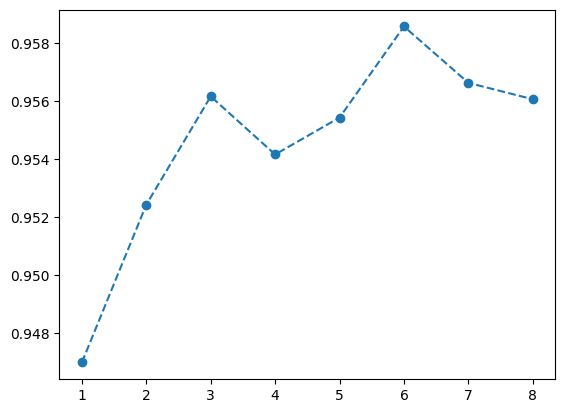

In [10]:
plt.plot(results['param_pca__n_components'],results['mean_test_score'],marker='o', linestyle='--')

In the PCA dimensionality reduction experiment, the R-squared score peaks at 6 principal components, indicating optimal dimensionality for capturing meaningful variance in the data.

# APPLYING MODEL 
### Applying regression model to predict response Y
Keep note our main goal is to find if the semicondutor is faulty or not

In [11]:
best_pipeline = grid_search.best_estimator_

# Extract the fitted PCA transformer from the pipeline
fitted_pca = best_pipeline.named_steps['pca'].transform(X)
columns = [f'PC{i+1}' for i in range(fitted_pca.shape[1])]
fitted_pca_df = pd.DataFrame(fitted_pca, columns=columns)

# Merge DataFrames based on the 'ID' column
merged_df = pd.merge(wafer_df,fitted_pca_df, left_index=True,right_index=True, how='left')
columns=['X6', 'X7', 'X8', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15']
merged_df=merged_df.drop(columns=columns)
merged_df

,X1-1,X1-2,X2-1,X2-2,X2-3,X3-1,X3-2,X3-3,X3-4,X4-1,X4-2,X4-3,X4-4,X4-5,X4-6,X4-7,X5-1,X5-2,X5-3,X5-4,X5-5,X5-6,X5-7,X5-8,X5-9,X5-10,X5-11,X5-12,X5-13,X5-14,X5-15,X5-16,X5-17,X5-18,X5-19,X5-20,X5-21,X5-22,Y,PC1,PC2,PC3,PC4,PC5,PC6
0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1546.836248,1264.757189,3.566399,-33.635911,-31.060765,5.185316,-1.616264
1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1261.722593,1264.350368,4.616388,-50.882849,-18.103583,0.514070,-2.368693
2,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,860.853275,-129.572141,-37.950899,31.649189,-3.245028,-88.091448,-9.839031
3,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,887.356349,-129.572145,-37.950922,31.649164,-3.245008,-88.091368,-9.839002
4,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,895.059756,-129.572145,-37.950922,31.649164,-3.245007,-88.091367,-9.839002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13181,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,129.837500,-329.526921,201.348764,-215.366997,1.909603,-52.544250,25.538646
13182,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7.835104,-195.974897,37.089275,-81.836058,-58.829050,79.950910,36.539096
13183,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7.835104,-190.543600,26.196081,-67.968921,-78.557009,4.324644,96.129339
13184,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,128.375500,-327.041428,213.070449,-77.354847,21.242336,90.200685,25.153491


# Feature importance with PCA
### Calculating Feature importance after replacing with pca components

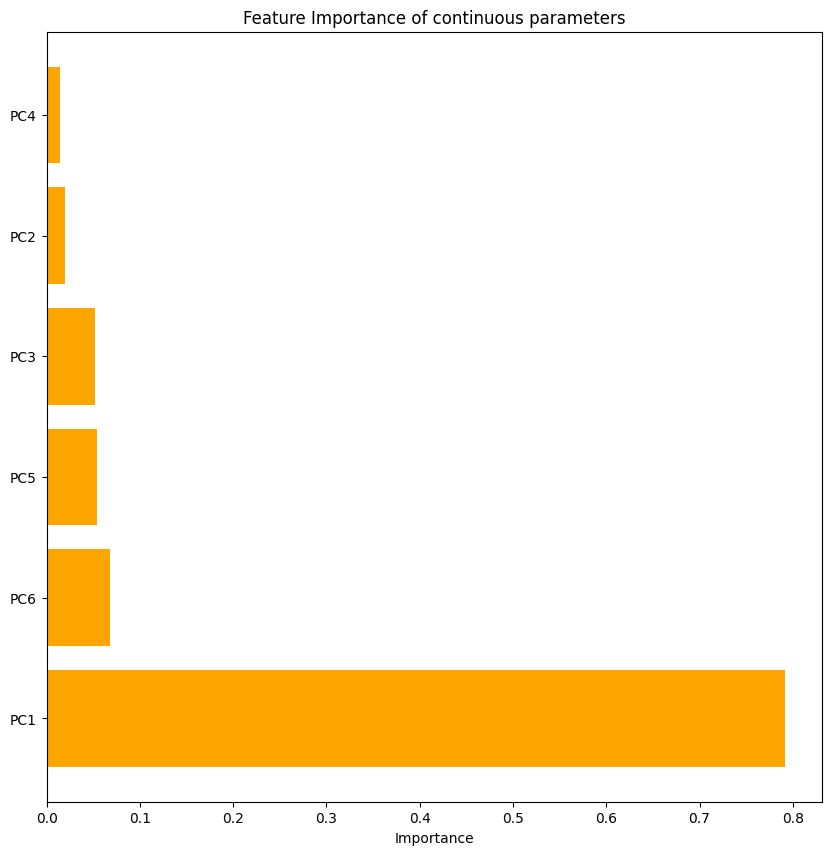

In [12]:
X=merged_df.iloc[:,39:45]
y=merged_df['Y']

#FITTING THE MODEL RANDOM FOREST
model=RandomForestRegressor()
model.fit(X,y)

#FEATURE IMPORTANCE
featrue_importance=model.feature_importances_
feature_importances_df=pd.DataFrame({"Feature":X.columns,"Importance":featrue_importance})
feature_importances_df=feature_importances_df.sort_values(by='Importance',ascending=False)
plt.figure(figsize=(10,10))
plt.barh(feature_importances_df['Feature'],feature_importances_df['Importance'],color=['orange'])
plt.xlabel('Importance')
plt.title('Feature Importance of continuous parameters')
plt.show()

### We can see the difference betweem previous feature importance of numeric data.PCA has surely made some impact to our data.

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(merged_df.iloc[:,~merged_df.columns.isin(['Y'])], merged_df['Y'], test_size=0.4, random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

model_rf=RandomForestRegressor(n_estimators=100,random_state=42)
model_rf.fit(X_train,y_train)

y_pred_rf=model_rf.predict(X_val)

r2 = r2_score(y_val, y_pred_rf)
print("R-Squared: ",r2)

R-Squared:  0.9604969821331717


### The obtained R-squared value of 0.9605 for validation indicates a strong model fit, capturing 95.75% of the variance in the data. 
This high R-squared value suggests that the model effectively explains the variability, showcasing its robust performance in predicting the observed outcomes.

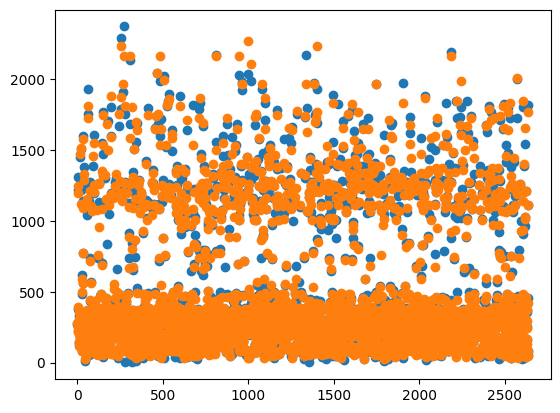

In [14]:
plt.scatter(np.arange(1,2638),y_val)
plt.scatter(np.arange(1,2638),y_pred_rf)

R-Squared:  0.9516067935094817


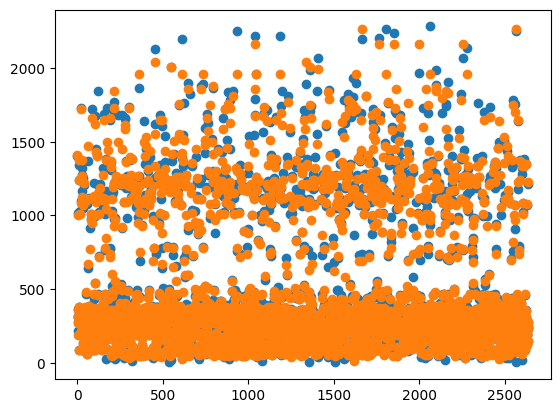

In [15]:
y_pred_rf_test=model_rf.predict(X_test)

r2 = r2_score(y_test, y_pred_rf_test)
print("R-Squared: ",r2)

plt.scatter(np.arange(1,2639),y_test)
plt.scatter(np.arange(1,2639),y_pred_rf_test)

As I mentioned above our main goal to find faulty semiconductor among given data. For this, we can see a boundary in the above plotting. So we did grid search for threshold to find the optimal threshold which can diffrentiate between faulty and non-faulty.

In [16]:
from sklearn.model_selection import ParameterGrid

def custom_evaluation_function(param_tune,y_test,merged_df,y_pred_rf_test):
    # Your custom logic here
    merged_df['response']=merged_df['Y'].apply(lambda x: 1 if x<param_tune else 0)
    y_test_df=y_test.apply(lambda x: 1 if x<param_tune else 0)
    # y_train_df=pd.DataFrame(y_train_df,columns=['response'])
    y_pred_rf_test=pd.DataFrame(y_pred_rf_test,columns=['Prediction'])
    y_pred_rf_test['response']=y_pred_rf_test['Prediction'].apply(lambda x: 1 if x<param_tune else 0)
    accuracy = accuracy_score(y_test_df, y_pred_rf_test['response'])
    return accuracy # Replace this with your actual evaluation logic

best_score=float('-inf')
best_threshold=None
plot_score=[]
plot_threshold=[]
for i in range(300,1300,10):
    current_score=custom_evaluation_function(i,y_test,merged_df,y_pred_rf_test)
    if current_score>best_score:
        best_score=current_score
        plot_score.append(best_score)
        plot_threshold.append(i)
        best_threshold=i
    else :
        plot_score.append(current_score)
        plot_threshold.append(i)

Threshold is: 610
Accuracy is: 99.27975739196361 %


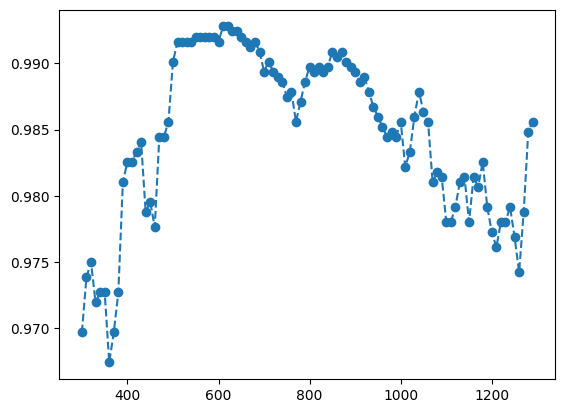

In [17]:
print("Threshold is:",best_threshold)
print("Accuracy is:",(best_score*100),"%")
plt.plot(plot_threshold,plot_score,marker='o',linestyle='--')

In [18]:
merged_df['response']=merged_df['Y'].apply(lambda x: 1 if x<610 else 0)
y_test_df=pd.DataFrame(y_test,columns=['Y'])
y_test_df['response']=y_test.apply(lambda x: 1 if x<610 else 0)
y_pred_rf_test=pd.DataFrame(y_pred_rf_test,columns=['Prediction'])
y_pred_rf_test['response']=y_pred_rf_test['Prediction'].apply(lambda x: 1 if x<610 else 0)
accuracy = accuracy_score(y_test_df['response'], y_pred_rf_test['response'])
print(accuracy)

0.9927975739196361


FROM THE ABOVE METHOD WE WERE ABLE TO GET 99.27% ACCURACY WITH THE HELP OF CUSTOMIZED GRID SEARCH ALGORITHM TO FIND BEST 
THRESHOLD POSSIBLE WITH BEST ACCURACY SCORE

In [19]:
y_train=pd.DataFrame(y_train,columns=['Prediction'])
y_train['response']=y_train['Prediction'].apply(lambda x: 1 if x<610 else 0)

print("Number of Faulty semiconductors present",y_test_df[y_test_df['response']==0].shape[0])
print("Number of Faulty semiconductors predicted",y_pred_rf_test[y_pred_rf_test['response']==0].shape[0])

Number of Faulty semiconductors present 659
Number of Faulty semiconductors predicted 662


## WE DETECT 662 FAULTY SEMICONDUCTOR AMONG 659 REAL FAULTY SEMICONDUCTOR WITH 0.6% FALSE NEGATIVE RATIO.

In [20]:
import gradio as gr
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming 'Y' is the target variable
columns=['Y','response']
X = merged_df.drop(columns, axis=1)
y = merged_df['Y']

# Define the function for prediction based on the trained model
def predict_output(*input_array):
    input_string = ' '.join(input_array)
    input_values = list(map(float, input_string.split()))
    prediction = model_rf.predict([input_values])[0]  # Predict using the trained model
    if prediction>610:
        return 'Faulty'
    else:
        return 'Faultless'

# Define the Gradio interface
input_components = []
for i in range(len(X.columns)):  # Assuming all columns except 'Y' are features
    input_components.append(gr.Textbox(type="text", label=f"Feature {i+1}"))

output_component = gr.Textbox(label="Predicted Output")

gr.Interface(predict_output, inputs=input_components, outputs=output_component, title="Wafer Model Predictor").launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
